###以下為Q1比較不同隱藏層的比較###

###一層隱藏層 e5###

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8695 - loss: 0.4613 - val_accuracy: 0.9619 - val_loss: 0.1299
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9672 - loss: 0.1170 - val_accuracy: 0.9728 - val_loss: 0.0879
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9800 - loss: 0.0692 - val_accuracy: 0.9738 - val_loss: 0.0827
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9865 - loss: 0.0474 - val_accuracy: 0.9783 - val_loss: 0.0690
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9902 - loss: 0.0348 - val_accuracy: 0.9801 - val_loss: 0.0660
Training time: 37.95512843132019 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9767 - loss: 0.0775
Test Accuracy: 0.9800999760627747
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Precision: 0.9801
Recall: 0.9801
F1 Score: 0.9801


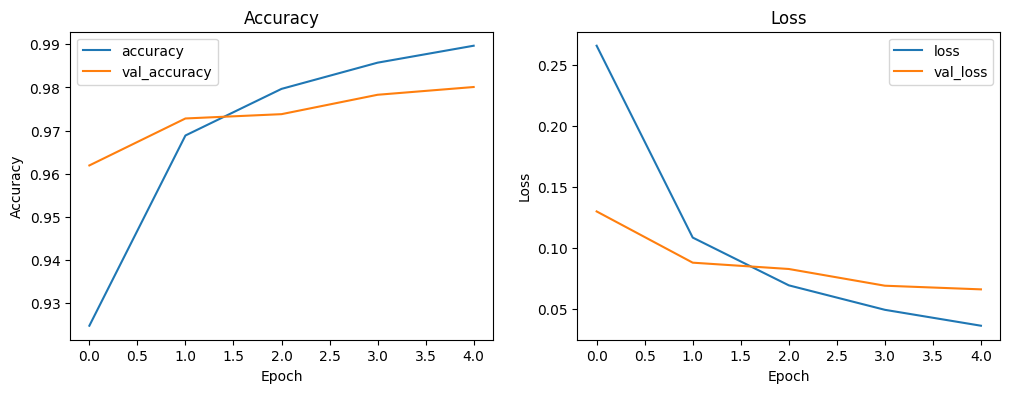

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=5, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


###兩層隱藏層 e5###

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8823 - loss: 0.3978 - val_accuracy: 0.9672 - val_loss: 0.1067
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9751 - loss: 0.0845 - val_accuracy: 0.9726 - val_loss: 0.0865
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9847 - loss: 0.0491 - val_accuracy: 0.9783 - val_loss: 0.0739
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9894 - loss: 0.0336 - val_accuracy: 0.9767 - val_loss: 0.0830
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9914 - loss: 0.0270 - val_accuracy: 0.9734 - val_loss: 0.0840
Training time: 52.77524733543396 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9680 - loss: 0.1008
Test Accuracy: 0.9733999967575073
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Precision: 0.9739
Recall: 0.9734
F1 Score: 0.9734


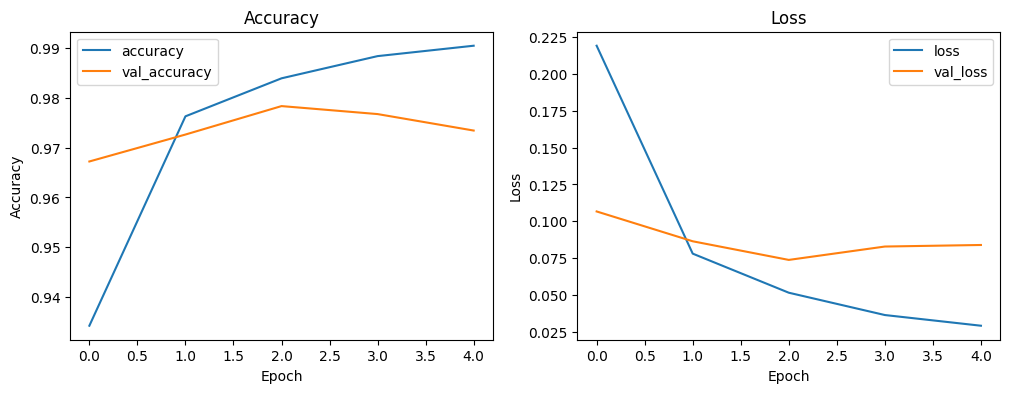

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=5, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


###三層 E5###

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - accuracy: 0.8859 - loss: 0.3889 - val_accuracy: 0.9674 - val_loss: 0.1009
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9735 - loss: 0.0847 - val_accuracy: 0.9708 - val_loss: 0.0938
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.9835 - loss: 0.0520 - val_accuracy: 0.9805 - val_loss: 0.0648
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9888 - loss: 0.0357 - val_accuracy: 0.9768 - val_loss: 0.0815
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9914 - loss: 0.0289 - val_accuracy: 0.9825 - val_loss: 0.0684
Training time: 79.97776651382446 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9783 - loss: 0.0819
Test Accuracy: 0.9825000166893005
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Precision: 0.9826
Recall: 0.9825
F1 Score: 0.9825


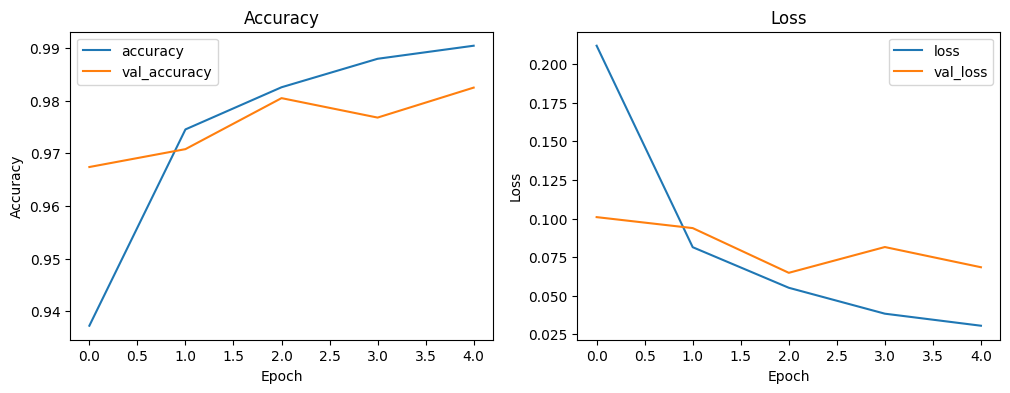

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=5, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


###四層 E5###

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.8743 - loss: 0.4082 - val_accuracy: 0.9701 - val_loss: 0.1004
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.9753 - loss: 0.0831 - val_accuracy: 0.9705 - val_loss: 0.0916
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9834 - loss: 0.0554 - val_accuracy: 0.9672 - val_loss: 0.1071
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.9857 - loss: 0.0451 - val_accuracy: 0.9775 - val_loss: 0.0808
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 45ms/step - accuracy: 0.9889 - loss: 0.0356 - val_accuracy: 0.9742 - val_loss: 0.0872
Training time: 120.02350926399231 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9690 - loss: 0.1021
Test Accuracy: 0.9742000102996826
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Precision: 0.9747
Recall: 0.9742
F1 Score: 0.9742


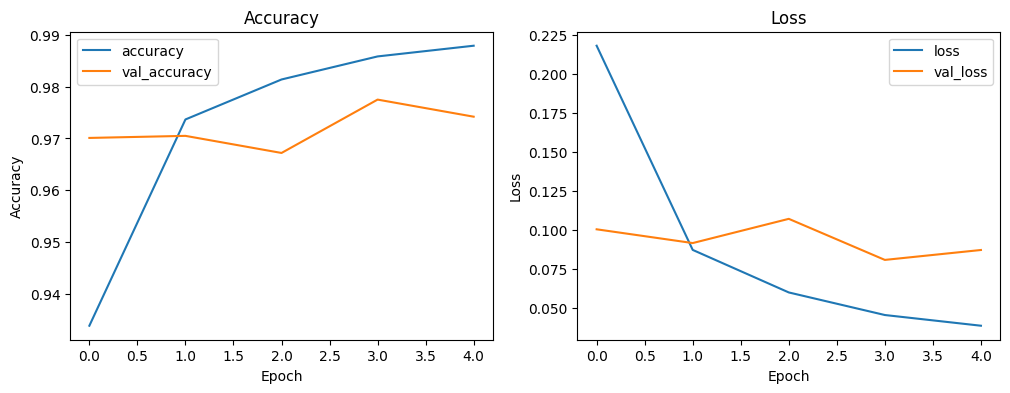

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=5, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


###5層 E5###

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.8731 - loss: 0.4114 - val_accuracy: 0.9570 - val_loss: 0.1394
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.9686 - loss: 0.1039 - val_accuracy: 0.9705 - val_loss: 0.0961
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.9810 - loss: 0.0624 - val_accuracy: 0.9755 - val_loss: 0.0853
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.9853 - loss: 0.0491 - val_accuracy: 0.9768 - val_loss: 0.0842
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9880 - loss: 0.0395 - val_accuracy: 0.9764 - val_loss: 0.0847
Training time: 102.2164454460144 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9722 - loss: 0.1018
Test Accuracy: 0.9764000177383423
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Precision: 0.9766
Recall: 0.9764
F1 Score: 0.9764


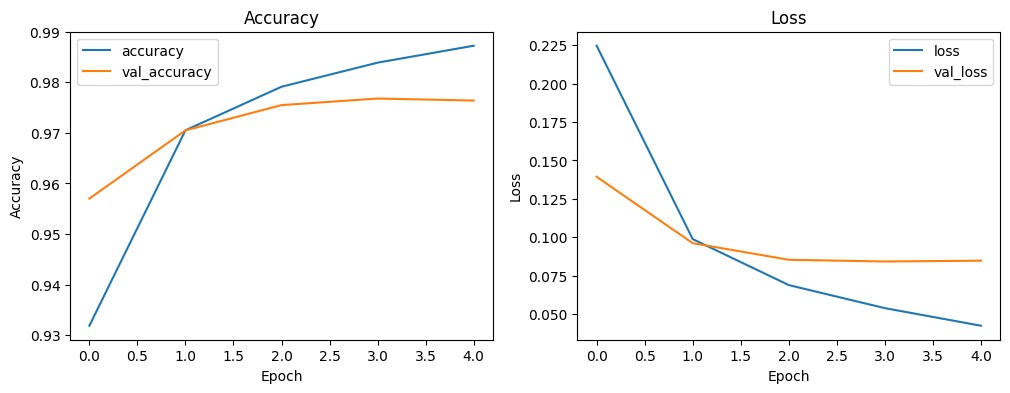

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=5, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


###6層 E5###

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 49ms/step - accuracy: 0.8657 - loss: 0.4358 - val_accuracy: 0.9644 - val_loss: 0.1220
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 60ms/step - accuracy: 0.9680 - loss: 0.1068 - val_accuracy: 0.9674 - val_loss: 0.1104
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 65ms/step - accuracy: 0.9786 - loss: 0.0725 - val_accuracy: 0.9748 - val_loss: 0.0929
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 58ms/step - accuracy: 0.9847 - loss: 0.0541 - val_accuracy: 0.9748 - val_loss: 0.0954
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 79ms/step - accuracy: 0.9855 - loss: 0.0499 - val_accuracy: 0.9749 - val_loss: 0.0897
Training time: 210.47821283340454 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9713 - loss: 0.1024
Test Accuracy: 0.9749000072479248
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
Precision: 0.9752
Recall: 0.9749
F1 Score: 0.9749


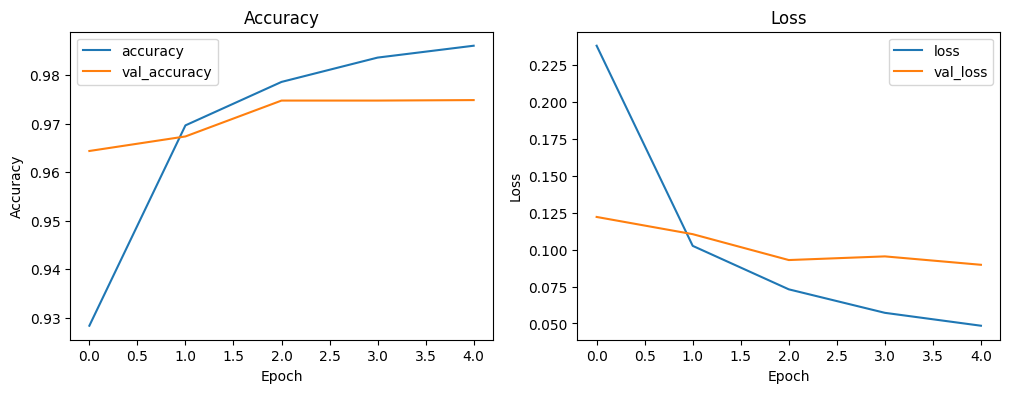

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=5, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


###7層 E5###

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 87ms/step - accuracy: 0.8538 - loss: 0.4656 - val_accuracy: 0.9572 - val_loss: 0.1492
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 90ms/step - accuracy: 0.9665 - loss: 0.1166 - val_accuracy: 0.9720 - val_loss: 0.0898
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 67s 58ms/step - accuracy: 0.9783 - loss: 0.0774 - val_accuracy: 0.9784 - val_loss: 0.0849
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 54ms/step - accuracy: 0.9836 - loss: 0.0602 - val_accuracy: 0.9758 - val_loss: 0.1004
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.9839 - loss: 0.0565 - val_accuracy: 0.9765 - val_loss: 0.0990
Training time: 234.36727356910706 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9711 - loss: 0.1250
Test Accuracy: 0.9764999747276306
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Precision: 0.9768
Recall: 0.9765
F1 Score: 0.9765


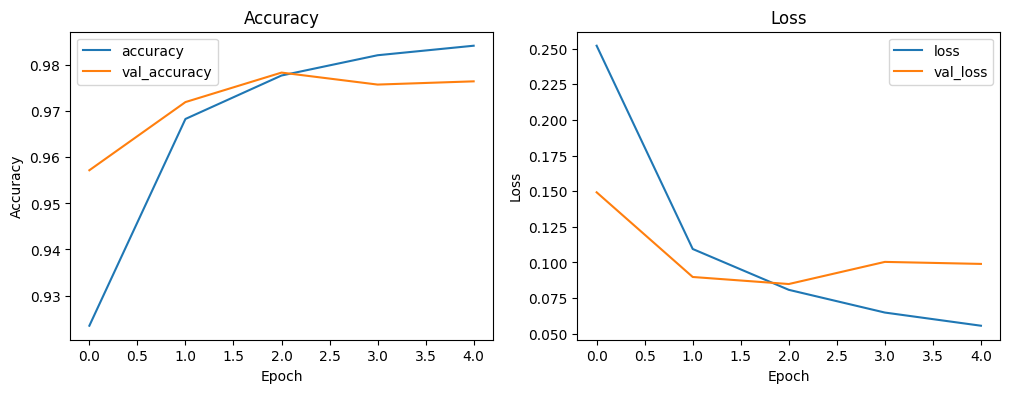

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=5, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


### e15 1###

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8720 - loss: 0.4574 - val_accuracy: 0.9608 - val_loss: 0.1330
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9666 - loss: 0.1153 - val_accuracy: 0.9669 - val_loss: 0.1049
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9796 - loss: 0.0714 - val_accuracy: 0.9750 - val_loss: 0.0818
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9863 - loss: 0.0487 - val_accuracy: 0.9792 - val_loss: 0.0692
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9901 - loss: 0.0359 - val_accuracy: 0.9775 - val_loss: 0.0673
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9928 - loss: 0.0249 - val_accuracy: 0.9781 - val_loss: 0.0691
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9945 - loss: 0.0203 - val_accuracy: 0.9805 - val_loss: 0.0648
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9968 - loss: 0.0135 - val_acc

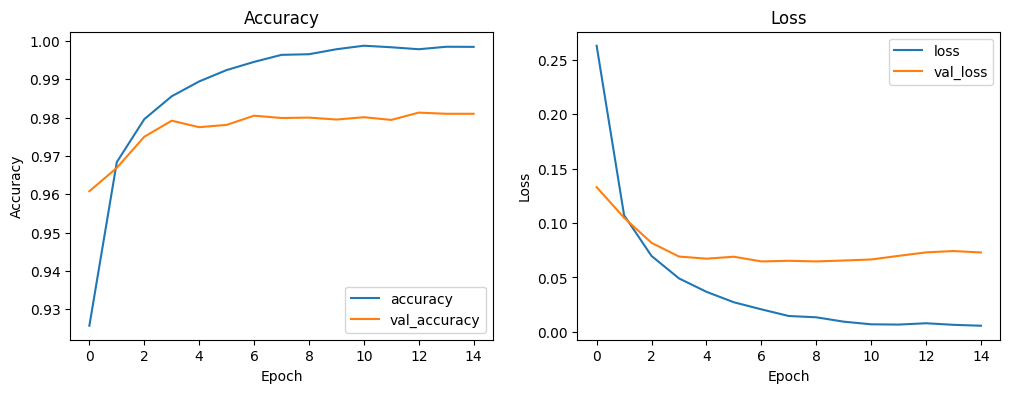

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=15, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


###e15 2###

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8814 - loss: 0.4023 - val_accuracy: 0.9695 - val_loss: 0.0971
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9744 - loss: 0.0835 - val_accuracy: 0.9753 - val_loss: 0.0763
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9842 - loss: 0.0495 - val_accuracy: 0.9784 - val_loss: 0.0630
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9888 - loss: 0.0339 - val_accuracy: 0.9775 - val_loss: 0.0717
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9926 - loss: 0.0240 - val_accuracy: 0.9789 - val_loss: 0.0707
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9944 - loss: 0.0183 - val_accuracy: 0.9811 - val_loss: 0.0687
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9938 - loss: 0.0181 - val_accuracy: 0.9768 - val_loss: 0.0923
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9954 - loss: 0.0138 - v

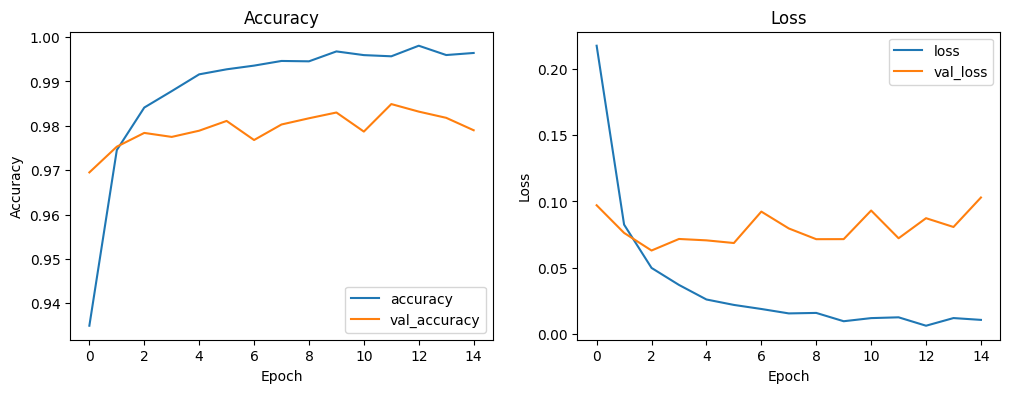

In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=15, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


###e15 3###

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - accuracy: 0.8844 - loss: 0.3911 - val_accuracy: 0.9687 - val_loss: 0.1033
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9758 - loss: 0.0823 - val_accuracy: 0.9769 - val_loss: 0.0746
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9836 - loss: 0.0517 - val_accuracy: 0.9745 - val_loss: 0.0773
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.9867 - loss: 0.0406 - val_accuracy: 0.9739 - val_loss: 0.0812
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.9902 - loss: 0.0291 - val_accuracy: 0.9775 - val_loss: 0.0757
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.9912 - loss: 0.0281 - val_accuracy: 0.9786 - val_loss: 0.0812
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.9930 - loss: 0.0212 - val_accuracy: 0.9802 - val_loss: 0.0728
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.9939 - loss: 0.0188 - 

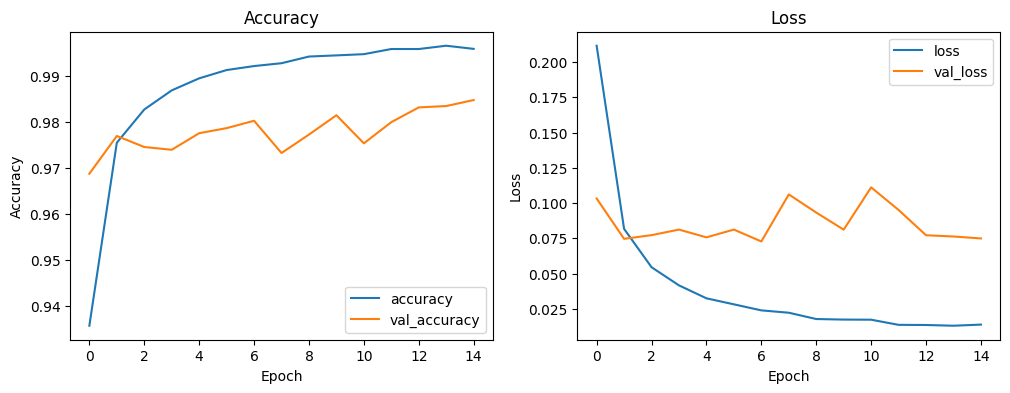

In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=15, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


###e15 4###

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.8735 - loss: 0.4133 - val_accuracy: 0.9587 - val_loss: 0.1351
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.9710 - loss: 0.0945 - val_accuracy: 0.9681 - val_loss: 0.1078
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9809 - loss: 0.0616 - val_accuracy: 0.9782 - val_loss: 0.0738
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9858 - loss: 0.0448 - val_accuracy: 0.9777 - val_loss: 0.0799
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - accuracy: 0.9894 - loss: 0.0328 - val_accuracy: 0.9766 - val_loss: 0.0861
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.9905 - loss: 0.0310 - val_accuracy: 0.9761 - val_loss: 0.0888
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9914 - loss: 0.0262 - val_accuracy: 0.9819 - val_loss: 0.0712
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 46ms/step - accuracy: 0.9940 - loss: 0.0194 - 

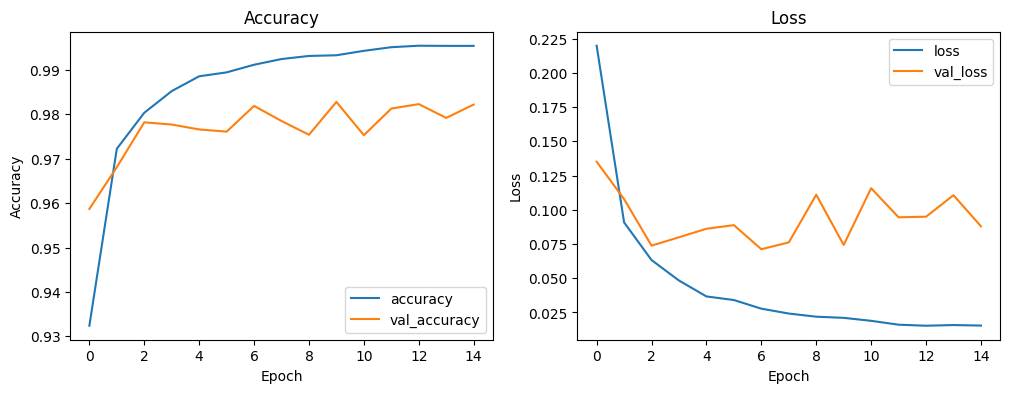

In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=15, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


###e15 5###

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.8631 - loss: 0.4237 - val_accuracy: 0.9584 - val_loss: 0.1333
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.9681 - loss: 0.1056 - val_accuracy: 0.9706 - val_loss: 0.1005
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.9796 - loss: 0.0667 - val_accuracy: 0.9725 - val_loss: 0.0880
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9834 - loss: 0.0528 - val_accuracy: 0.9782 - val_loss: 0.0814
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - accuracy: 0.9884 - loss: 0.0400 - val_accuracy: 0.9777 - val_loss: 0.0865
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.9901 - loss: 0.0332 - val_accuracy: 0.9738 - val_loss: 0.1012
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 41ms/step - accuracy: 0.9906 - loss: 0.0334 - val_accuracy: 0.9797 - val_loss: 0.0809
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9926 - loss: 0.0241 - 

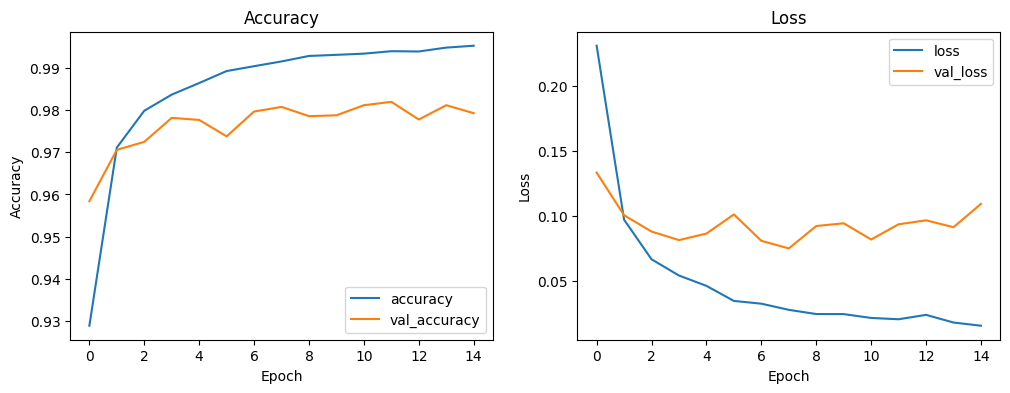

In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=15, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


###e15 6###

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 44ms/step - accuracy: 0.8643 - loss: 0.4332 - val_accuracy: 0.9610 - val_loss: 0.1325
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9708 - loss: 0.1029 - val_accuracy: 0.9676 - val_loss: 0.1192
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9788 - loss: 0.0763 - val_accuracy: 0.9719 - val_loss: 0.1026
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.9828 - loss: 0.0605 - val_accuracy: 0.9762 - val_loss: 0.0885
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 47ms/step - accuracy: 0.9871 - loss: 0.0443 - val_accuracy: 0.9784 - val_loss: 0.0841
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - accuracy: 0.9887 - loss: 0.0393 - val_accuracy: 0.9746 - val_loss: 0.0934
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 46ms/step - accuracy: 0.9896 - loss: 0.0363 - val_accuracy: 0.9786 - val_loss: 0.0920
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.9925 - loss: 0.0286 - 

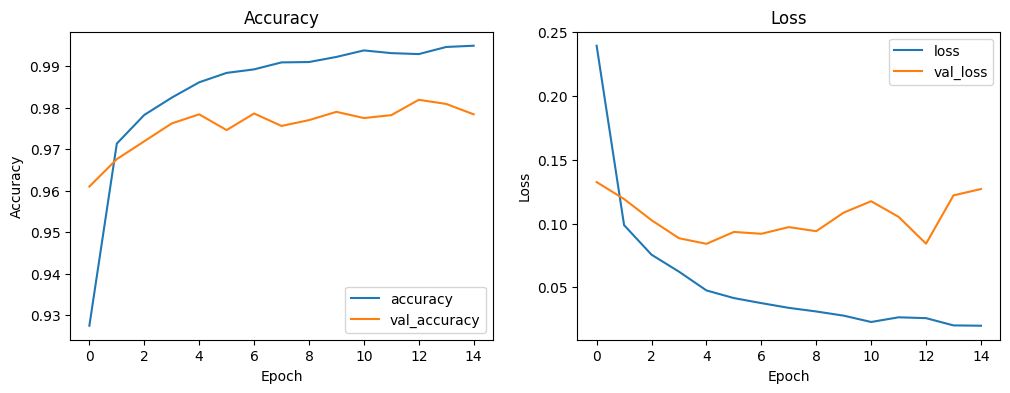

In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=15, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


###e15 7###

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 53ms/step - accuracy: 0.8538 - loss: 0.4642 - val_accuracy: 0.9646 - val_loss: 0.1218
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.9675 - loss: 0.1125 - val_accuracy: 0.9692 - val_loss: 0.1073
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.9790 - loss: 0.0757 - val_accuracy: 0.9715 - val_loss: 0.1012
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.9828 - loss: 0.0608 - val_accuracy: 0.9741 - val_loss: 0.1015
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.9853 - loss: 0.0530 - val_accuracy: 0.9783 - val_loss: 0.0966
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 46ms/step - accuracy: 0.9870 - loss: 0.0467 - val_accuracy: 0.9794 - val_loss: 0.0788
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 49ms/step - accuracy: 0.9890 - loss: 0.0410 - val_accuracy: 0.9766 - val_loss: 0.0999
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.9908 - loss: 0.0335 - 

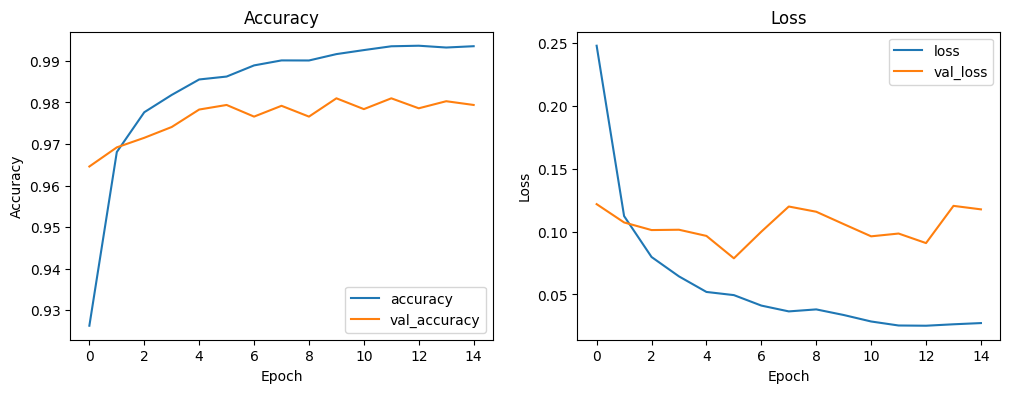

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=15, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


###e25 1###

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.8698 - loss: 0.4595 - val_accuracy: 0.9600 - val_loss: 0.1386
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9652 - loss: 0.1201 - val_accuracy: 0.9704 - val_loss: 0.0979
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9790 - loss: 0.0740 - val_accuracy: 0.9746 - val_loss: 0.0805
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9854 - loss: 0.0509 - val_accuracy: 0.9794 - val_loss: 0.0664
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9901 - loss: 0.0363 - val_accuracy: 0.9789 - val_loss: 0.0649
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9925 - loss: 0.0271 - val_accuracy: 0.9809 - val_loss: 0.0640
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9949 - loss: 0.0200 - val_accuracy: 0.9798 - val_loss: 0.0662
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9969 - loss: 0.0145 - val_ac

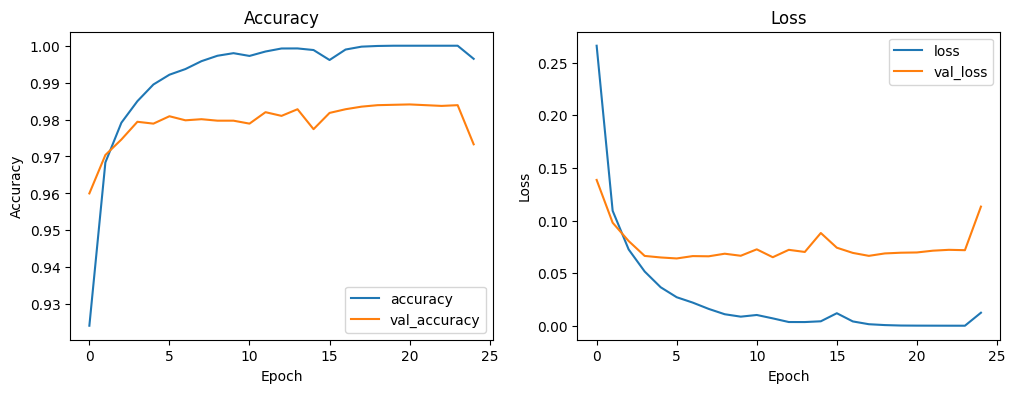

In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=25, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


###e25 2###

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.8830 - loss: 0.4029 - val_accuracy: 0.9677 - val_loss: 0.1027
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9747 - loss: 0.0820 - val_accuracy: 0.9744 - val_loss: 0.0809
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9846 - loss: 0.0497 - val_accuracy: 0.9764 - val_loss: 0.0770
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9896 - loss: 0.0328 - val_accuracy: 0.9783 - val_loss: 0.0712
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9918 - loss: 0.0258 - val_accuracy: 0.9783 - val_loss: 0.0699
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9940 - loss: 0.0184 - val_accuracy: 0.9779 - val_loss: 0.0821
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9943 - loss: 0.0172 - val_accuracy: 0.9780 - val_loss: 0.0864
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9950 - loss: 0.0142 - val

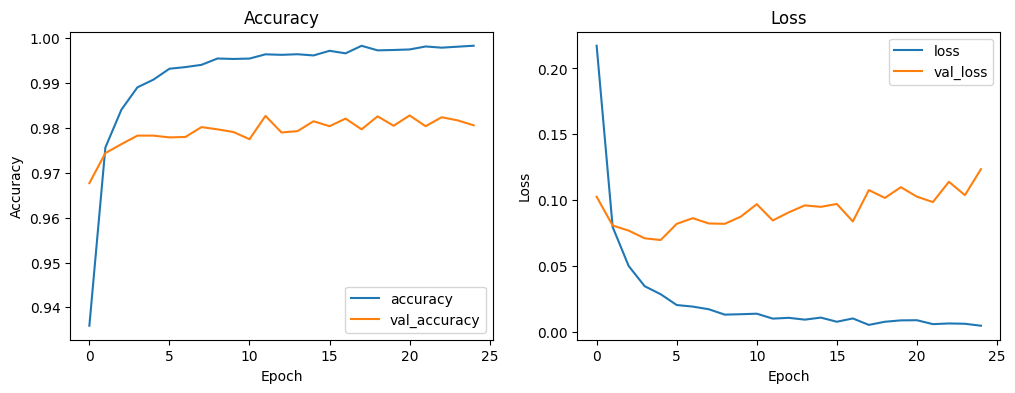

In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=25, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


###e25 3###

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.8871 - loss: 0.3825 - val_accuracy: 0.9682 - val_loss: 0.1031
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9743 - loss: 0.0842 - val_accuracy: 0.9739 - val_loss: 0.0849
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9826 - loss: 0.0534 - val_accuracy: 0.9729 - val_loss: 0.0862
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9873 - loss: 0.0399 - val_accuracy: 0.9793 - val_loss: 0.0678
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9907 - loss: 0.0281 - val_accuracy: 0.9769 - val_loss: 0.0792
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9919 - loss: 0.0235 - val_accuracy: 0.9813 - val_loss: 0.0726
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.9934 - loss: 0.0193 - val_accuracy: 0.9797 - val_loss: 0.0781
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9942 - loss: 0.0191 - 

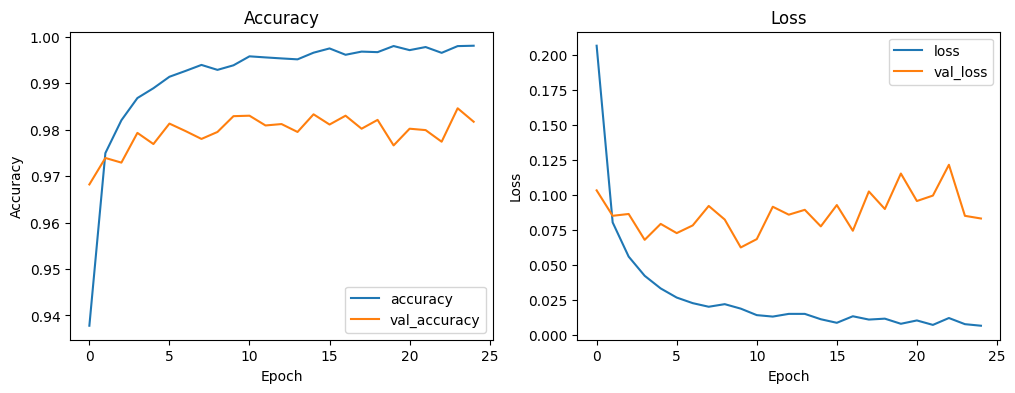

In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=25, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


###e25 4###

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 33ms/step - accuracy: 0.8756 - loss: 0.4098 - val_accuracy: 0.9600 - val_loss: 0.1299
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.9728 - loss: 0.0874 - val_accuracy: 0.9751 - val_loss: 0.0892
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.9814 - loss: 0.0601 - val_accuracy: 0.9750 - val_loss: 0.0855
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.9864 - loss: 0.0465 - val_accuracy: 0.9746 - val_loss: 0.0851
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9896 - loss: 0.0331 - val_accuracy: 0.9770 - val_loss: 0.0842
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9903 - loss: 0.0307 - val_accuracy: 0.9782 - val_loss: 0.0820
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.9911 - loss: 0.0292 - val_accuracy: 0.9650 - val_loss: 0.1437
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9936 - loss: 0.0223 - 

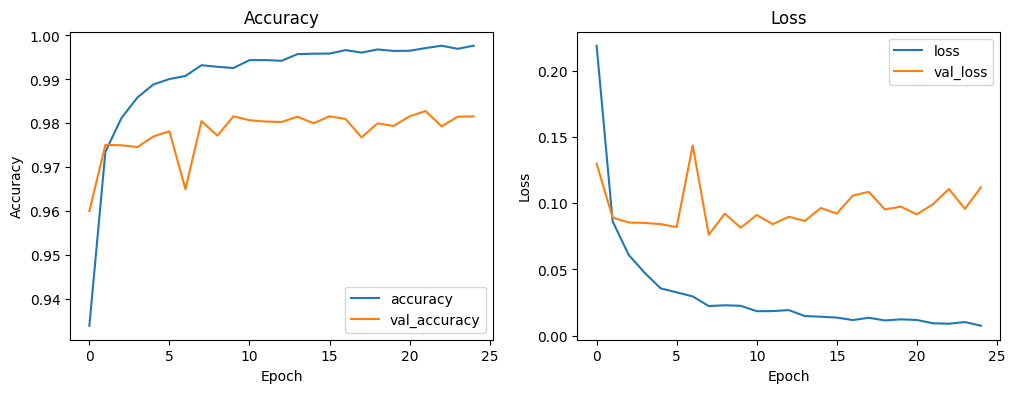

In [26]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=25, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


###e25 5###

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.8706 - loss: 0.4283 - val_accuracy: 0.9671 - val_loss: 0.1089
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - accuracy: 0.9726 - loss: 0.0939 - val_accuracy: 0.9719 - val_loss: 0.0912
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9807 - loss: 0.0648 - val_accuracy: 0.9691 - val_loss: 0.1052
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step - accuracy: 0.9860 - loss: 0.0480 - val_accuracy: 0.9747 - val_loss: 0.0925
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.9868 - loss: 0.0422 - val_accuracy: 0.9770 - val_loss: 0.0894
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9892 - loss: 0.0330 - val_accuracy: 0.9787 - val_loss: 0.0773
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9916 - loss: 0.0281 - val_accuracy: 0.9776 - val_loss: 0.0880
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.9921 - loss: 0.0260 - 

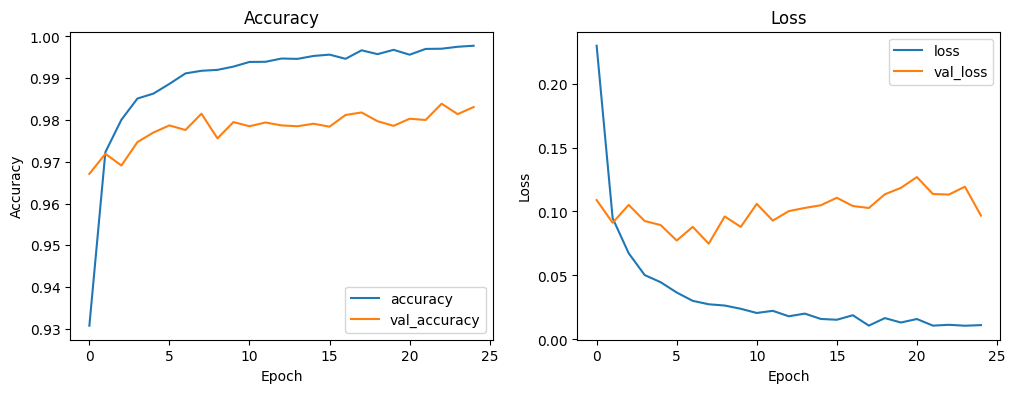

In [27]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=25, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


###e25 6###

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.8585 - loss: 0.4499 - val_accuracy: 0.9594 - val_loss: 0.1418
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9697 - loss: 0.1082 - val_accuracy: 0.9697 - val_loss: 0.1025
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9787 - loss: 0.0749 - val_accuracy: 0.9751 - val_loss: 0.0973
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.9826 - loss: 0.0593 - val_accuracy: 0.9763 - val_loss: 0.0923
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9875 - loss: 0.0450 - val_accuracy: 0.9732 - val_loss: 0.1017
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9882 - loss: 0.0400 - val_accuracy: 0.9787 - val_loss: 0.0915
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.9908 - loss: 0.0340 - val_accuracy: 0.9762 - val_loss: 0.0960
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 45ms/step - accuracy: 0.9906 - loss: 0.0334 - 

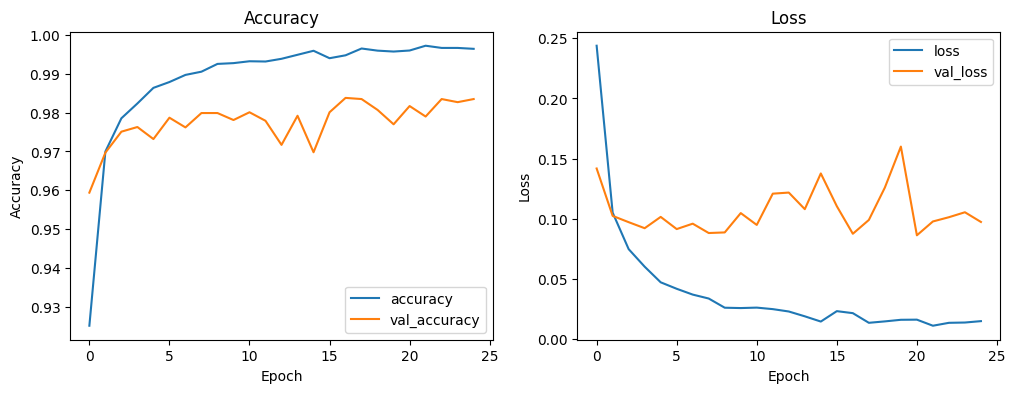

In [28]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=25, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


###e25 7###

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 53ms/step - accuracy: 0.8494 - loss: 0.4712 - val_accuracy: 0.9691 - val_loss: 0.1075
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.9669 - loss: 0.1120 - val_accuracy: 0.9714 - val_loss: 0.1034
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.9768 - loss: 0.0810 - val_accuracy: 0.9733 - val_loss: 0.1030
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.9817 - loss: 0.0641 - val_accuracy: 0.9779 - val_loss: 0.0871
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.9850 - loss: 0.0524 - val_accuracy: 0.9763 - val_loss: 0.0929
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - accuracy: 0.9873 - loss: 0.0467 - val_accuracy: 0.9710 - val_loss: 0.1260
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.9892 - loss: 0.0402 - val_accuracy: 0.9795 - val_loss: 0.0818
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.9901 - loss: 0.0382 - 

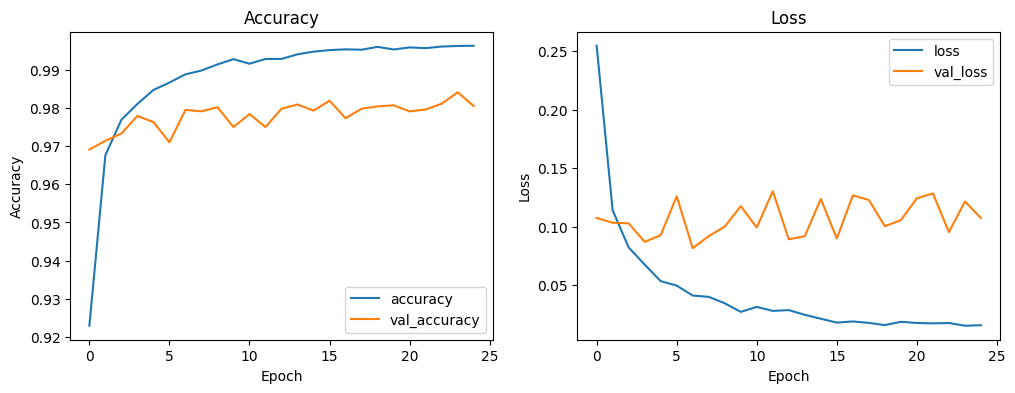

In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=25, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()
